## Installation of the libraries 

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Import of libraries 

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data recovery via a csv file

In [5]:

df = pd.read_csv('validation_metro.csv',sep=';')


## Raw data 

In [6]:
print(df.head())

         jour  code_stif_trns  code_stif_res  code_stif_arret   libelle_arret  \
0  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
1  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
2  2024-01-22             100          110.0            691.0  PTE D.CHAPELLE   
3  2024-01-22             100          110.0            692.0  PTE D.VILLETTE   
4  2024-01-22             100          110.0            693.0   PTE MONTREUIL   

     ida               categorie_titre  nb_vald  
0  72064                     Amethyste      292  
1  72064                 Autres titres      337  
2  72064                     Imagine R     1539  
3  72430  Contrat Solidarité Transport     2160  
4  71710  Contrat Solidarité Transport     2277  


## Example of a visualisation with the station PTE MONTREUIL for the date 2024-01-01

In [7]:
df_pte_montreuil = df[df['libelle_arret'] == 'PTE MONTREUIL']

In [8]:
print(df_pte_montreuil.head())

           jour  code_stif_trns  code_stif_res  code_stif_arret  \
4    2024-01-22             100          110.0            693.0   
5    2024-01-22             100          110.0            693.0   
6    2024-01-22             100          110.0            693.0   
7    2024-01-22             100          110.0            693.0   
956  2024-01-23             100          110.0            693.0   

     libelle_arret    ida               categorie_titre  nb_vald  
4    PTE MONTREUIL  71710  Contrat Solidarité Transport     2277  
5    PTE MONTREUIL  71710                Forfait Navigo     5137  
6    PTE MONTREUIL  71710                     Imagine R     1660  
7    PTE MONTREUIL  71710                    NON DEFINI      234  
956  PTE MONTREUIL  71710               Forfaits courts       45  


In [9]:
df_pte_montreuil_clean = df_pte_montreuil[['jour','libelle_arret','nb_vald']]

In [10]:
print(df_pte_montreuil_clean.head())

           jour  libelle_arret  nb_vald
4    2024-01-22  PTE MONTREUIL     2277
5    2024-01-22  PTE MONTREUIL     5137
6    2024-01-22  PTE MONTREUIL     1660
7    2024-01-22  PTE MONTREUIL      234
956  2024-01-23  PTE MONTREUIL       45


In [11]:
print(df_pte_montreuil_clean[df_pte_montreuil_clean['jour'] == '2024-01-01' ])

              jour  libelle_arret  nb_vald
427103  2024-01-01  PTE MONTREUIL      214
427107  2024-01-01  PTE MONTREUIL     1285
519907  2024-01-01  PTE MONTREUIL       55
640798  2024-01-01  PTE MONTREUIL       37
747712  2024-01-01  PTE MONTREUIL      327
747713  2024-01-01  PTE MONTREUIL     1068
747714  2024-01-01  PTE MONTREUIL      553


In [12]:
df_pte_montreuil_sum = df_pte_montreuil_clean.groupby('jour')['nb_vald'].sum().reset_index(name='somme_valeurs')

In [13]:
print(df_pte_montreuil_sum.head())

         jour  somme_valeurs
0  2024-01-01           3539
1  2024-01-02           7095
2  2024-01-03           8034
3  2024-01-04           8231
4  2024-01-05           8884


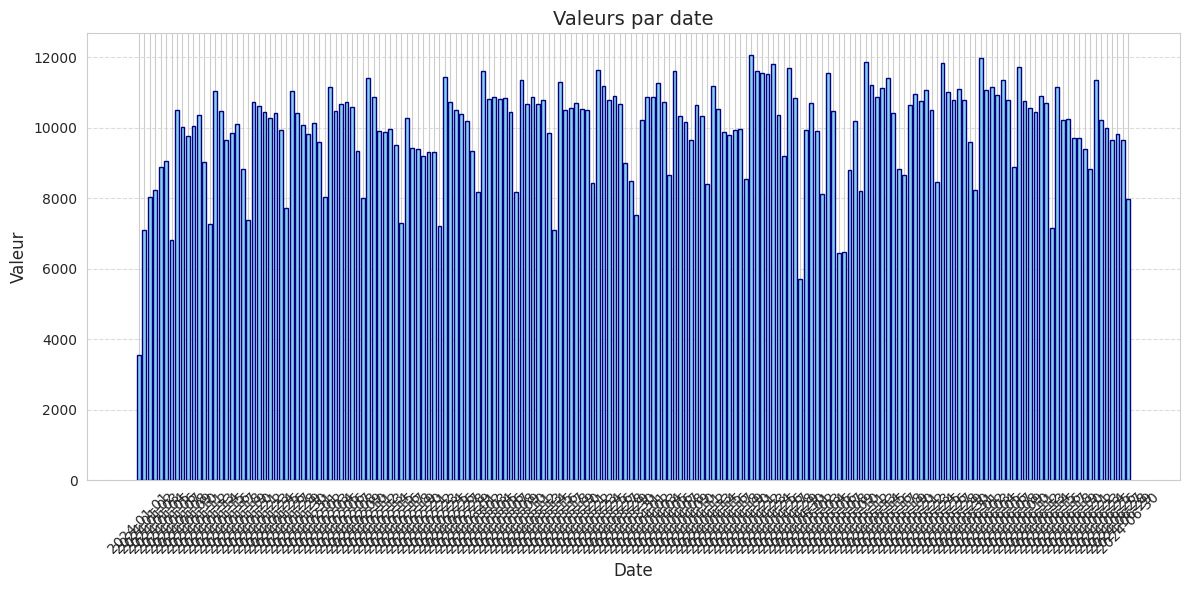

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
plt.bar(df_pte_montreuil_sum['jour'], df_pte_montreuil_sum['somme_valeurs'], width=0.7, color='skyblue', edgecolor='navy')

# Personnaliser le graphique
plt.title('Valeurs par date', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Ajuster automatiquement la mise en page
plt.tight_layout()



In [15]:
## Other visualizaion for the station CHATILLON-MON. for the date 2024-01-22

21300
7


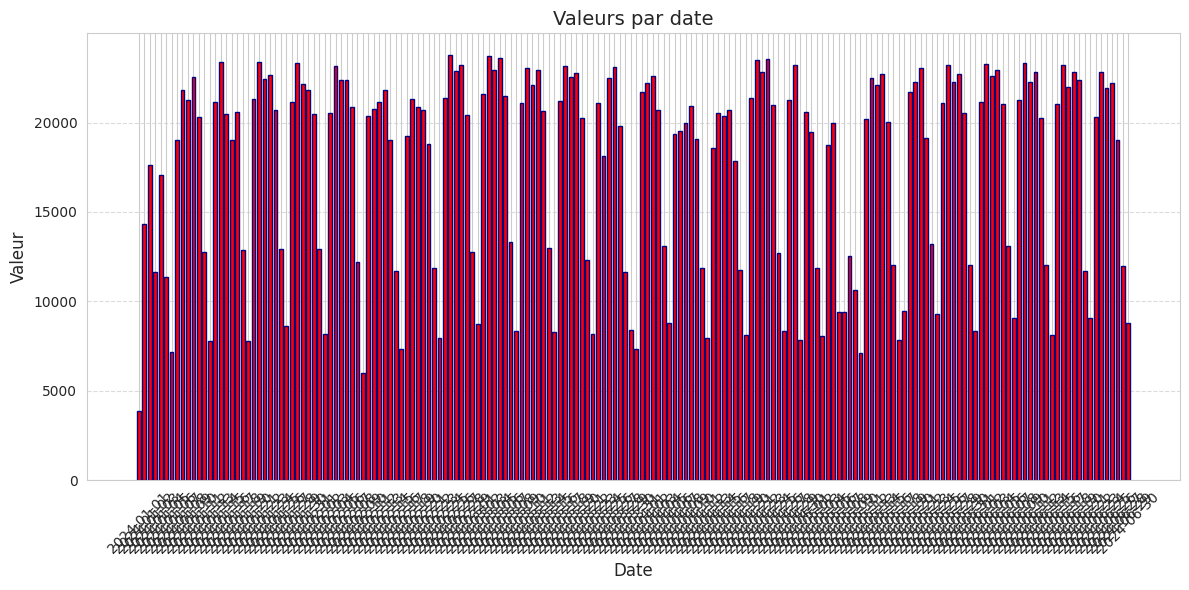

In [16]:
df_chatillon = df[df['libelle_arret'] == 'CHATILLON-MON.']
df_chatillon_clean = df_chatillon[['jour','libelle_arret','categorie_titre','nb_vald']]
print(df_chatillon_clean[df_chatillon_clean['jour'] == '2024-01-22' ]['nb_vald'].sum())
print(df_chatillon_clean[df_chatillon_clean['jour'] == '2024-01-22' ].shape[0])
df_chatillon_sum = df_chatillon_clean.groupby('jour')['nb_vald'].sum().reset_index(name='somme_valeurs')

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Créer le graphique en barres
plt.bar(df_chatillon_sum['jour'], df_chatillon_sum['somme_valeurs'], width=0.7, color='red', edgecolor='navy')

# Personnaliser le graphique
plt.title('Valeurs par date', fontsize=14)
plt.ylabel('Valeur', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Ajuster automatiquement la mise en page
plt.tight_layout()

In [17]:
df_test = df[df['libelle_arret'] == 'CHATILLON-MON.']

In [18]:
print(df_test.head())

            jour  code_stif_trns  code_stif_res  code_stif_arret  \
715   2024-01-23             100          110.0            171.0   
3000  2024-03-06             100          110.0            171.0   
3001  2024-03-06             100          110.0            171.0   
5229  2024-03-02             100          110.0            171.0   
5230  2024-03-02             100          110.0            171.0   

       libelle_arret     ida               categorie_titre  nb_vald  
715   CHATILLON-MON.  461505                     Amethyste      338  
3000  CHATILLON-MON.  461505                Forfait Navigo    13700  
3001  CHATILLON-MON.  461505                    NON DEFINI      820  
5229  CHATILLON-MON.  461505  Contrat Solidarité Transport     1344  
5230  CHATILLON-MON.  461505               Forfaits courts       78  
